# Project
## Link to GitHub repistory
https://github.com/Wen-Zhenyi/dsci-100-2025s1.git

## Question 1
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?


## 1. Introduction
### Background
The Computer Science research group at the University of British Columbia is running a Minecraft server to study how people play video games. They collect data about players and their actions in the game. One challenge they face is figuring out how to manage their resources, like server space and licenses, and how to reach out to players who are more likely to stay engaged.

One way they measure engagement is by checking whether a player subscribed to a game-related newsletter. Subscribing shows that the player is interested in the game. If we can predict which players are likely to subscribe based on how they play the game, it can help the team use their resources more efficiently.

---

### Question
*Can the total played hours predict whether a player has subscribed to this electronic newsletter in the Minecraft server dataset?*

In this project, I aim to investigate the average duration of each game session that players participated in, to see if these can help us predict whether the players have subscribed to this electronic newsletter. I will use the two variables in the dataset to answer this question.

---
### Data Description
I will use `played_hours` to predict the likelihood that a player subscribed to the newsletter.
- **Number of observations**: 196 players
- **Number of variables**: 7 columns
- **Key variables used in this project**:
  
| Column Name     | Description                                | Type     |
|------------------|--------------------------------------------|----------|
| `played_hours`   | Total hours the player spent in the game   | Numetric   |
| `subscribe`  | Whether the player subscribed to the newsletter (True or False) | Logical  |

- **Issues in the data**:

1.There are 2 missing values in `Age` and some missing or undefined values in `subscribe`.\
2.The data only includes a small number of players who both have session data and are subscribed, which may limit model performance.
  
- **Variable summary**:
| Column Name     | Description                                | Type     |
|------------------|--------------------------------------------|----------|
| `hashedEmail`    | Unique ID for each player                  | Categorical   |
| `subscribe`      | Whether the player subscribed to the newsletter (True or False) | Logical  |
| `experience`     | Player experience level (e.g., Pro, Amateur) | Categorical   |
| `gender`         | Player's gender                            | Categorical   |
| `Age`            | Player's age                               | Numeric  |
| `played_hours`   | Total hours the player spent in the game   | Numetric   |
| `name`           | Player’s in-game name (not used here)      | Categorical   |
| `hashedEmail`        | Unique ID to match with `players.csv`       | Categorical   |
| `original_start_time`| Start time of the session (Unix timestamp) | Numeric   |
| `original_end_time`  | End time of the session (Unix timestamp)   | Numeric   |


## 2. Methods and Results
### Data loading and cleaning
I will use the `players.csv` dataset, which contains information about 196 Minecraft players. Then I selected two columns: `played_hours` and `subscribe`. I removed useless columns such as `hashedEmail` and `name`. Below is my code.


In [1]:
library(tidyverse)


player <- read_csv("players.csv")
head(player)

clean_player <- select(player, played_hours, subscribe)
head(clean_player)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


played_hours,subscribe
<dbl>,<lgl>
30.3,TRUE
3.8,TRUE
0.0,FALSE
0.7,TRUE
0.1,TRUE
0.0,TRUE


### Data analysis
In this stage, I want to explore the relationship between playing time and subscription status, I create a box plot to visually compare how much time subscribed vs. non-subscribed players spent in the game. subscribed players is showed as "true" and non-subscribed players is showed as "false". Below is my code.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


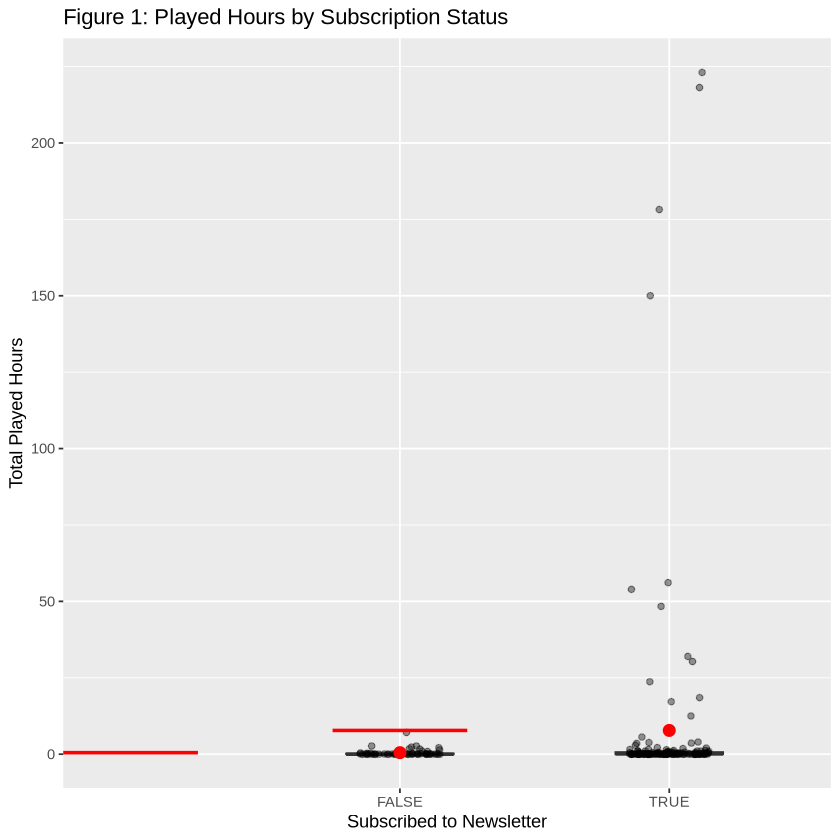

In [2]:
mean_df <- clean_player |>
  group_by(subscribe) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE))

Figure_1 <- ggplot(clean_player, aes(x = subscribe, y = played_hours)) +
  geom_boxplot(fill = "skyblue", alpha = 1, outlier.shape = NA, width = 0.4) + 
  geom_jitter(width = 0.15, alpha = 0.4, size = 1.5, color = "black") +        
  geom_point(data = mean_df, aes(x = subscribe, y = mean_hours), color = "red", size = 3) +  
  geom_segment(data = mean_df, aes(x = as.numeric(subscribe) - 0.25, 
                                   xend = as.numeric(subscribe) + 0.25, 
                                   y = mean_hours, yend = mean_hours),
               color = "red", size = 1) + 
  labs(title = "Figure 1: Played Hours by Subscription Status",
    x = "Subscribed to Newsletter",
    y = "Total Played Hours")

Figure_1

Figure 1 shows the total played hours of players who subscribed to the newsletter compared to those who did not. Most players, whether subscribed or not, played for only a short time. However, players who subscribed often played for longer, and some of them played for many more hours than non-subscribers. This suggests that players who are more active in the game are more likely to subscribe to the newsletter.
A boxplot is a useful method for comparing the distribution of a numeric variable across groups of a categorical variable (whether or not). A visual comparison of their playtime is appropriate and easy to interpret.

### Make prediction
This is a complete process of prediction. I already used boxplot to show their relationship, then I built a logistic regression model using total played hours to predict whether a player subscribed to the newsletter. Below is my code.

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.725
kap,binary,0.000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     11   29

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Failed to fit group -1.
Caused by error:
! y values must be 0 <= y <= 1”


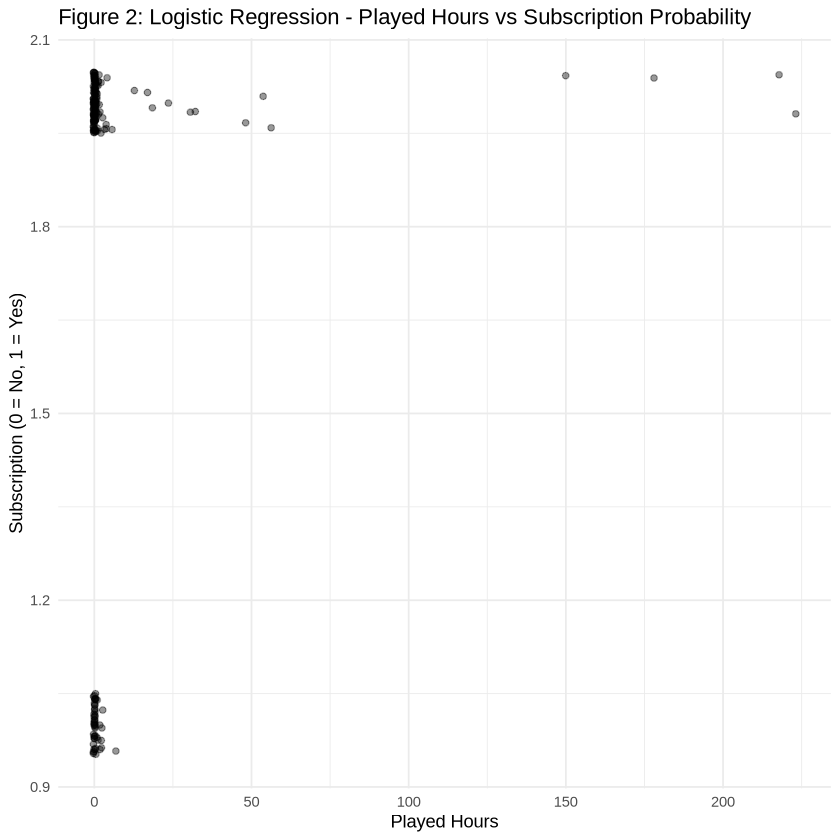

In [3]:
library(tidymodels)

clean_player$subscribe <- as.factor(clean_player$subscribe)

set.seed(123)
split <- initial_split(clean_player, prop = 0.8, strata = subscribe)
train_data <- training(split)
test_data <- testing(split)

model <- logistic_reg() |>
  set_engine("glm") |>
  set_mode("classification")

recipe <- recipe(subscribe ~ played_hours, data = train_data)

workflow <- workflow() |>
  add_recipe(recipe) |>
  add_model(model)

fit_model <- workflow |>fit(data = train_data)


predictions <- predict(fit_model, new_data = test_data, type = "class") |>
  bind_cols(test_data)

metrics(predictions, truth = subscribe, estimate = .pred_class)
conf_mat(predictions, truth = subscribe, estimate = .pred_class)

Figure_2 <- ggplot(clean_player, aes(x = played_hours, y = as.numeric(subscribe))) +
  geom_jitter(width = 0.3, height = 0.05, alpha = 0.4, size = 1.5, color = "black") +  
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE, color = "blue") +  
  labs(title = "Figure 2: Logistic Regression - Played Hours vs Subscription Probability",
    x = "Played Hours",
    y = "Subscription (0 = No, 1 = Yes)") +
  theme_minimal()

Figure_2

I employed the logistic regression method to predict whether players would subscribe to the electronic newsletter based on their gaming duration. This approach is a good choice because the outcome has only two possibilities (yes or no), and I only used one numerical value for the prediction. I divided the data into 80% for training and 20% for testing. The model was trained on the training set and tested on the remaining data. Figure 2 shows the results: as the gaming duration increases, the likelihood of subscription also increases. This is in line with our expectations, that is, more active players are more likely to subscribe. However, this method has some limitations - it may miss more complex patterns and does not include other details about the players that might affect the results. Overall, it provides us with a simple and clear view of the relationship between gaming duration and subscription.

## 3.Discussion
This project aims to investigate whether the total time spent by players in the game world of "Minecraft" can help predict whether they will subscribe to this electronic newsletter. After building a model and analyzing the relevant data, I found that players who spent more time in the game were more likely to subscribe to the newsletter. This result is not surprising because those players who enjoy the game and spend more time in it are likely to want to stay informed about the latest developments, which is a natural thing.
My findings are in line with my expectations. I originally thought that more active players would be more engaged overall, and the data confirmed this view. The relationship between game time and subscription is also clear, although I only used one variable.
These results will be helpful for the team responsible for server operations. If they want to increase the number of subscribers to the email newsletter, they can focus on already active players, or they can find ways to keep new players sufficiently engaged so that they can later become interested in subscribing.
This project also raises more questions. For example, do different player types behave differently in subscription behavior? Do their game time, login frequency, and other factors also affect this behavior? With more data or more variables, we can try a largermodel and delve deeper into the more patterns of player behavior.
